In [1]:
# import dependencies
import pandas as pd
from matplotlib import pyplot

In [2]:
# read predict data
predict_data = pd.read_csv("resources/predict_data.csv", index_col=0)

predict_data

,Winner,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,...,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_age,B_age,B_winratio,R_winratio,B_totalfights,R_totalfights
0,Red,0,1,0,3.420000,0.5900,0.700000,0.240000,1.0000,4,...,13,Orthodox,187.96,193.04,37,29,0.714286,0.619048,7,21
1,Blue,2,0,0,5.160000,0.4200,0.800000,0.790000,0.2200,2,...,11,Orthodox,180.34,193.04,33,32,0.545455,0.578947,11,19
2,Blue,1,0,0,2.920000,0.4100,0.100000,1.150000,0.3400,5,...,6,Orthodox,190.50,195.58,34,32,0.642857,0.600000,14,10
3,Red,1,0,0,4.040000,0.3400,0.000000,0.000000,0.0000,0,...,4,Orthodox,175.26,182.88,29,32,0.000000,0.571429,1,7
4,Blue,0,2,0,5.220000,0.5600,0.000000,2.540000,0.3900,2,...,4,Orthodox,175.26,177.80,28,33,0.625000,1.000000,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,Red,1,0,0,5.250000,0.5550,0.125000,0.000000,0.0000,2,...,5,Orthodox,182.88,182.88,28,31,0.500000,0.500000,8,10
4889,Red,1,0,0,10.750000,0.3325,1.250000,1.250000,0.6625,1,...,5,Orthodox,170.18,177.80,28,28,0.500000,0.500000,4,10
4890,Blue,0,1,0,22.166667,0.5100,0.166667,2.500000,0.4800,2,...,3,Orthodox,187.96,195.58,29,39,0.666667,1.000000,6,3
4893,Red,1,0,0,8.000000,0.3400,1.000000,1.000000,1.0000,0,...,0,Orthodox,193.04,198.12,27,27,0.000000,0.000000,1,1


Preprocess data for machine learning models

In [3]:
# Assign X (data) and y (target)
X = predict_data.drop("Winner", axis=1)
y = predict_data["Winner"]

In [4]:
# Use Pandas get_dummies to convert categorical data
X = pd.get_dummies(X)

X.columns

Index(['B_current_lose_streak', 'B_current_win_streak', 'B_draw',
       'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT',
       'B_avg_TD_landed', 'B_avg_TD_pct', 'B_longest_win_streak', 'B_losses',
       'B_total_rounds_fought', 'B_total_title_bouts',
       'B_win_by_Decision_Majority', 'B_win_by_Decision_Split',
       'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission',
       'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Height_cms', 'B_Reach_cms',
       'R_current_lose_streak', 'R_current_win_streak', 'R_draw',
       'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT',
       'R_avg_TD_landed', 'R_avg_TD_pct', 'R_longest_win_streak', 'R_losses',
       'R_total_rounds_fought', 'R_total_title_bouts',
       'R_win_by_Decision_Majority', 'R_win_by_Decision_Split',
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Height_cms', 'R_Reach_cms',
       'R_age', 

In [5]:
# Split data for training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

Try logistic regression model

In [8]:
# create logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [9]:
# Fit model using training data
classifier.fit(X_train_scaled, encoded_y_train)

LogisticRegression()

In [10]:
# Calculate the accuracy score and predict target values
score = classifier.score(X_test_scaled, encoded_y_test)
print("Accuracy: {0:.2f} %".format(100 * score))
y_predict = classifier.predict(X_test_scaled)

Accuracy: 61.26 %


Try deep neural network

In [11]:
# Create neural network with 52 inputs, 100 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=56))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
87/87 - 0s - loss: 0.6967 - accuracy: 0.5666 - 350ms/epoch - 4ms/step
Epoch 2/100
87/87 - 0s - loss: 0.6317 - accuracy: 0.6417 - 61ms/epoch - 699us/step
Epoch 3/100
87/87 - 0s - loss: 0.6015 - accuracy: 0.6835 - 63ms/epoch - 722us/step
Epoch 4/100
87/87 - 0s - loss: 0.5850 - accuracy: 0.6882 - 64ms/epoch - 734us/step
Epoch 5/100
87/87 - 0s - loss: 0.5569 - accuracy: 0.7191 - 69ms/epoch - 791us/step
Epoch 6/100
87/87 - 0s - loss: 0.5269 - accuracy: 0.7477 - 68ms/epoch - 779us/step
Epoch 7/100
87/87 - 0s - loss: 0.4870 - accuracy: 0.7684 - 69ms/epoch - 791us/step
Epoch 8/100
87/87 - 0s - loss: 0.4656 - accuracy: 0.7844 - 66ms/epoch - 757us/step
Epoch 9/100
87/87 - 0s - loss: 0.4186 - accuracy: 0.8229 - 72ms/epoch - 825us/step
Epoch 10/100
87/87 - 0s - loss: 0.3825 - accuracy: 0.8490 - 78ms/epoch - 892us/step
Epoch 11/100
87/87 - 0s - loss: 0.3470 - accuracy: 0.8603 - 62ms/epoch - 711us/step
Epoch 12/100
87/87 - 0s - loss: 0.3106 - accuracy: 0.8817 - 63ms/epoch - 722us/step
Ep

In [14]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

29/29 - 0s - loss: 3.5890 - accuracy: 0.5441 - 134ms/epoch - 5ms/step
Normal Neural Network - Loss: 3.589019298553467, Accuracy: 0.5440696477890015


Try random forest model

In [15]:
# Create Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)

In [16]:
# Fit the classifier to the data
rf = rf.fit(X_train_scaled, y_train_categorical)
rf.score(X_test_scaled, y_test_categorical)

0.5843307943416758

Logistic regression model has the highest accuracy (63%), therefore this will be used to create our prediction

B_current_lose_streak: -0.033738280945557315
B_current_win_streak: -0.17329752561543224
B_draw: -0.07178418334873976
B_avg_SIG_STR_landed: -0.09089332896520412
B_avg_SIG_STR_pct: 0.00014537159396095766
B_avg_SUB_ATT: 0.00031710546946651686
B_avg_TD_landed: -0.16775726038956906
B_avg_TD_pct: 0.017127293820240155
B_longest_win_streak: 0.06488177840218715
B_losses: 0.02936409688754114
B_total_rounds_fought: 0.2656772352835206
B_total_title_bouts: 0.02020472122088414
B_win_by_Decision_Majority: 0.034347060963194606
B_win_by_Decision_Split: 0.11104575858937181
B_win_by_Decision_Unanimous: -0.04380777845538955
B_win_by_KO/TKO: 0.03236299465864947
B_win_by_Submission: 0.034600487044657194
B_win_by_TKO_Doctor_Stoppage: 0.06357166892872526
B_wins: -0.2602479021675643
B_Height_cms: 0.07964470621063607
B_Reach_cms: -0.2064340496888729
R_current_lose_streak: -0.0344008806609688
R_current_win_streak: 0.045833187760602835
R_draw: 0.037348958092008964
R_avg_SIG_STR_landed: 0.04688388213366475
R_avg_S

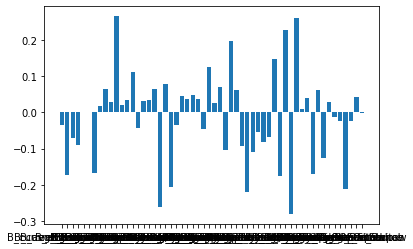

In [17]:
# get importance
importance = classifier.coef_[0]

# Get features
features = X.columns

# summarize feature importance
feature_count = 0

for i,v in enumerate(importance):
	print(f"{features[feature_count]}: {v}")
	feature_count += 1

pyplot.bar(features,importance)

features_df = pd.DataFrame(importance, features)
features_df.to_csv("resources/features.csv")

In [18]:
# save model 
import joblib 

joblib.dump(classifier, "ml_models/model.sav")
joblib.dump(X_scaler, "ml_models/x_scaler.sav")
joblib.dump(label_encoder, "ml_models/encoder.sav")
joblib.dump(features, "ml_models/features.sav")

['ml_models/features.sav']